In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data = pd.read_csv('data/city_data.csv')
ride_data = pd.read_csv('data/ride_data.csv')
#print(city_data.head())
#print(ride_data.head())

# Double-check for any null values: answer: there are no nulls.
# city_data.info()
# ride_data.info()

# Combine the data into a single dataset
# Display the data table for preview
# how='left' displays keys from left df which is ride_data
merged_pyber_city = ride_data.merge(city_data, on='city', how='left')
merged_pyber_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
#print(merged_pyber_city.describe())
#print(merged_pyber_city['driver_count'].sum())

In [12]:
#print(city_data.describe())
#print(city_data['driver_count'].sum())

In [13]:
# Group merged df by type + city
city_type = merged_pyber_city.groupby(['type','city'])
#city_type.describe()

# Looping through each type,city to perform calculation functions
for city,ride_stats in city_type:
    #print(city)
    avg_fare = city_type['fare'].mean()
    ride_count = city_type['ride_id'].count()
    driver_count = city_type['driver_count'].mean()
#avg_fare
#ride_count
#driver_count


## Bubble Plot of Ride Sharing Data

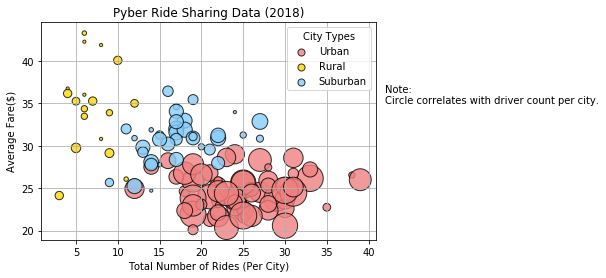

In [14]:
# Obtain the x and y coordinates for each of the three city types
#x=ride_count
#y=avg_fare

# Build the scatter plots for each city types
plt.scatter(ride_count.loc['Urban'],avg_fare['Urban'],label='Urban',
           marker='o',facecolor='lightcoral',edgecolor='black',
           alpha=0.80,s=driver_count['Urban']*10)
plt.scatter(ride_count.loc['Rural'],avg_fare['Rural'],label='Rural',
           marker='o',facecolor='gold',edgecolor='black',
           alpha=0.80,s=driver_count['Rural']*10)
plt.scatter(ride_count.loc['Suburban'],avg_fare['Suburban'],label='Suburban',
           marker='o',facecolor='lightskyblue',edgecolor='black',
           alpha=0.80,s=driver_count['Suburban']*10)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid()

# Create a legend
legend_summary = plt.legend(title='City Types',loc='best')
for handle in legend_summary.legendHandles:
    handle.set_sizes([50])
# Incorporate a text label regarding circle size
plt.text(42,35,'Note: \nCircle correlates with driver count per city.')

# Save Figure
plt.savefig('2018_Pyber_Ride_Data.png',bbox_inches='tight')

# Show plot
plt.show()

## Total Fares by City Type

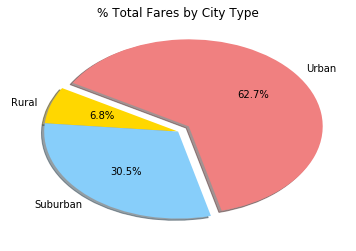

In [15]:
# Calculate Type Percents
grouped_type = merged_pyber_city.groupby('type')
fare_total = grouped_type.sum()['fare']
#fare_total

# Build Pie Chart
plt.pie(fare_total,
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=(0,0,0.1),
        shadow=True,
        startangle=150,
        autopct='%1.1f%%')
plt.title('% Total Fares by City Type')

# Save Figure
plt.savefig('2018_Pyber_Fares_by_CityType.png')

# Show Figure
plt.show()

## Total Rides by City Type

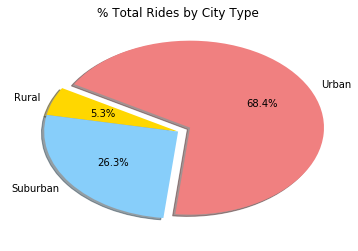

In [16]:
# Calculate Ride Percents
ride_total = grouped_type.count()['ride_id']
#ride_total

# Build Pie Chart
plt.pie(ride_total,
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=(0,0,.1),
        shadow=True,
        startangle=150,
        autopct='%1.1f%%')
plt.title('% Total Rides by City Type')

# Save Figure
plt.savefig('2018_Pyber_Rides_by_CityType.png')

# Show Figure
plt.show()

## Total Drivers by City Type

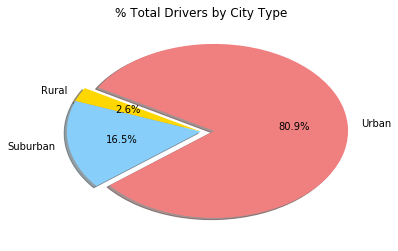

In [17]:
# Calculate Driver Percents
grouped_type = city_data.groupby('type')
driver_total = grouped_type.sum()['driver_count']
#driver_total

# Build Pie Charts
plt.pie(driver_total,
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=(0,0,0.1),
        shadow=True,
        startangle=150,
        autopct='%1.1f%%')
plt.title('% Total Drivers by City Type')

# Save Figure
plt.savefig('2018_Pyber_Drivers_by_CityType.png')

# Show Figure
plt.show()

# Pyber Data Analysis

In the market of transportation services, Pyber aims to identify what factors contribute most to their business needs to combat the competition from other companies like Uber and Lyft. From the provided Pyber recordset, one can make certain observable trends to succeed in this business market.

Not surprisingly, out of the three city types, urban areas constitute a majority of our services and business profits; followed by suburban areas, and lastly, rural areas. This makes sense as urban areas contain a very congested and high population where people live near industrial and commerical hubs. This high population explains why urban areas make up about 80.9% of the total Pyber drivers, 68.4% of the total ride services, and 62.7% of the total fares. Suburban areas comes in second place for our services as the suburbs are the family-housing residental hubs that locate near the urban areas. Finally, rural areas, where these locations are usually designated as the countryside with open farmlands and natural resources, rarely require Pyber services as the population in rural areas small in comparison to the other city types.

There is a noticeable negative correlation between the average fares vs the number of Pyber rides among the city types. The more rides Pyber is able to provide in a city type, the cheaper the cost of each services. Also, the less amount of available Pyber drivers there are in a city type, the more expensive the fares will be for Pyber services. Subjected to the laws of supply and demand, when there is a shift in supply (ie. total Pyber drivers), the prices of the fares will change accordingly. This is not to say to fire some of the Pyber drivers to increase the fare prices, because even though a decrease in supply will mean increase in price, the demand for Pyber services will also decrease accordingly, and competition from Uber and Lyft will take over due Pyber's higher fares.

One noteable trend is that despite the popularity from urban areas, some urban cities have outliers that may need further research. For example, some of the urban cities in the observed bubble plot, show an increase in the number of Pyber rides despite lower driver counts (as portrayed in the varying sizes of the urban plot points). These outlier points look to be similar to the rural plot points. Whether or not these outlier city types are profitable for Pyber is up for debate as more information may be needed, such as average distance traveled per ride, geographic size, etc.